In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [36]:
def small_world_network(N, Z, p):
    G = nx.Graph()
    
    # Adicionando nós
    for i in range(N):
        G.add_node(i)
    
    # Adicionando arestas curtas
    for i in range(N):
        for j in range(1, Z//2 + 1):
            G.add_edge(i, (i+j) % N)
            G.add_edge(i, (i-j) % N)
    
    # Adicionando atalhos
    num_shortcuts = int(p * N * Z // 2)
    attempts = 0
    added_shortcuts = 0
    while added_shortcuts < num_shortcuts and attempts < num_shortcuts * 10:
        u = random.randint(0, N-1)
        v = random.randint(0, N-1)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
            added_shortcuts += 1
        attempts += 1
    
    return G


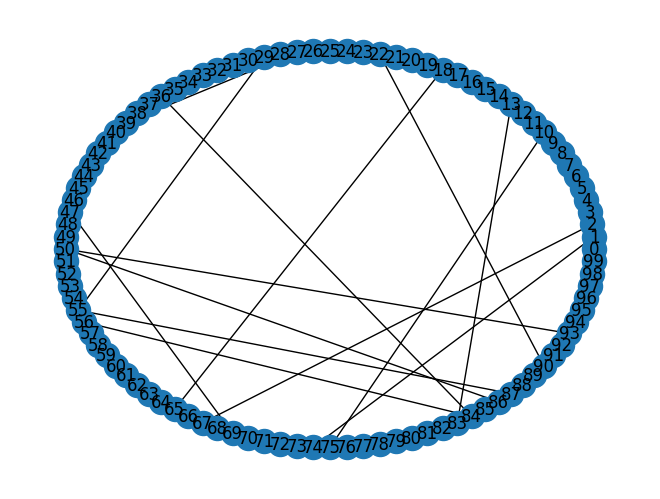

In [37]:
N = 100
Z = 4
p = 0.1
G = small_world_network(N, Z, p)
nx.draw_circular(G, with_labels=True)
plt.show()

In [38]:
def find_path_lengths_from_node(graph, node):
    lengths = nx.single_source_shortest_path_length(graph, node)
    return lengths

In [39]:
def find_all_path_lengths(graph):
    all_lengths = []
    for node in tqdm(graph.nodes(), desc="Calculating path lengths from each node"):
        lengths = find_path_lengths_from_node(graph, node)
        all_lengths.extend(lengths.values())
    return all_lengths

Calculating path lengths from each node: 100%|██████████| 100/100 [00:00<00:00, 22727.20it/s]


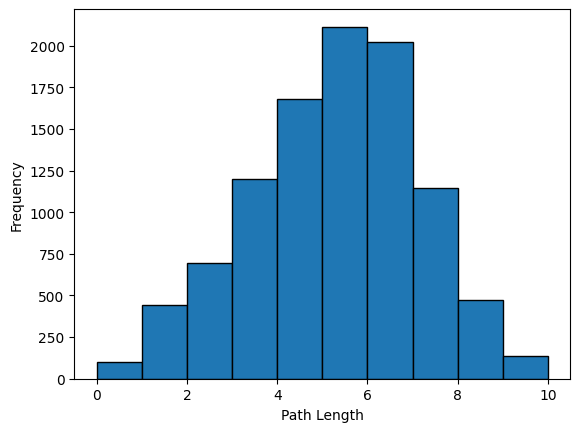

In [40]:
all_path_lengths = find_all_path_lengths(G)
plt.hist(all_path_lengths, bins=range(max(all_path_lengths)+1), edgecolor='black')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.show()

In [41]:
def find_average_path_length(graph):
    return nx.average_shortest_path_length(graph)

In [42]:
avg_path_length = find_average_path_length(G)
print(f'Average path length: {avg_path_length}')

Average path length: 4.833333333333333


In [43]:
def plot_average_path_length_vs_p(N, Z):
    p_values = [10**i for i in range(-3, 4)]
    d_p0 = find_average_path_length(small_world_network(N, Z, 0))
    average_lengths = []

    for p in tqdm(p_values, desc="Calculating average path lengths for different p values"):
        G = small_world_network(N, Z, p)
        avg_length = find_average_path_length(G)
        average_lengths.append(avg_length / d_p0)

    plt.semilogx(p_values, average_lengths, marker='o')
    plt.xlabel('p')
    plt.ylabel('Average Path Length / d(p=0)')
    plt.title(f'N={N}, Z={Z}')
    plt.grid(True)
    plt.show()

Calculating average path lengths for different p values: 100%|██████████| 7/7 [00:00<00:00,  9.51it/s]


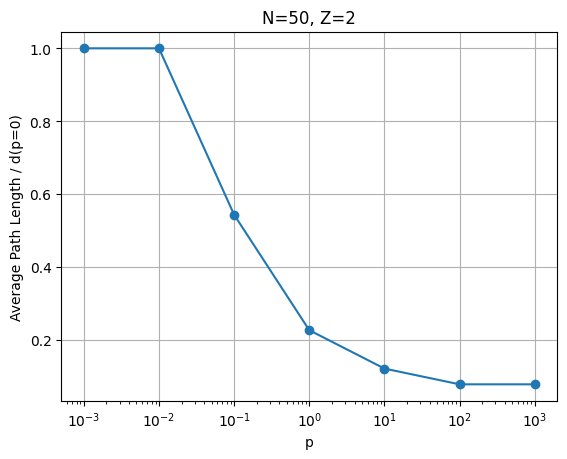

In [44]:

plot_average_path_length_vs_p(50, 2)
